In [28]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from citipy import citipy
from config import weather_api_key
from datetime import datetime
from scipy.stats import linregress

In [7]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(-90.0, 90.0, size=1500)
lngs = np.random.uniform(-90.0, 90.0, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [8]:
coordinates = list(lat_lngs)

In [9]:
# Create a list of cities from the list of latitude & longitude
cities = []

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    # If the city does not exist in the list, add it to the cities list
    if city not in cities:
        cities.append(city)
len(cities)

612

In [10]:
# URL for Weather Map API Call
OpenWeather_url = "https://api.openweathermap.org/data/2.5/weather?"

In [11]:
# Create an empty list to hold the weather data
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city name
    query_url = OpenWeather_url + "units=imperial" + "&appid=" + weather_api_key + "&q=" + city

    # Log the URL, record and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to record_count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(query_url).json()
        
        # Retrieve required data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_maxtemp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append data into city_data list
        city_data.append({"City":city.title(),
                         "Lat":city_lat,
                         "Lng":city_lng,
                         "Max Temp":city_maxtemp,
                         "Humidity":city_humidity,
                         "Cloudiness":city_clouds,
                         "Wind Speed":city_wind,
                         "Country":city_country,
                         "Date":city_date})
    
    # In case of error, skip the current city
    except:
        print("City Not Found. Skipping...")
        pass

# Completion of Data Retrieval
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | trincomalee
Processing Record 2 of Set 1 | sao filipe
Processing Record 3 of Set 1 | attawapiskat
City Not Found. Skipping...
Processing Record 4 of Set 1 | nanortalik
Processing Record 5 of Set 1 | mehamn
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | calamar
Processing Record 9 of Set 1 | boyuibe
Processing Record 10 of Set 1 | los llanos de aridane
Processing Record 11 of Set 1 | bardsir
Processing Record 12 of Set 1 | georgetown
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | mar del plata
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | leh
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | husavik
Processing Record 19 of Set 1 | san carlos de bariloche
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | skjervoy
Processing Record 2

In [12]:
city_data_df = pd.DataFrame(city_data)
city_data_df = city_data_df[['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']]

In [13]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Trincomalee,LK,2020-04-04 15:55:02,8.57,81.23,82.02,83,1,8.61
1,Sao Filipe,CV,2020-04-04 15:55:02,14.90,-24.50,75.47,72,0,18.77
2,Nanortalik,GL,2020-04-04 15:55:03,60.14,-45.24,29.17,91,100,13.29
3,Mehamn,NO,2020-04-04 15:55:04,71.04,27.85,26.85,90,100,28.81
4,Port Alfred,ZA,2020-04-04 15:55:04,-33.59,26.89,84.88,49,3,9.51
5,Cape Town,ZA,2020-04-04 15:55:04,-33.93,18.42,73.99,72,100,6.93
6,Calamar,CO,2020-04-04 15:55:05,10.25,-74.91,87.80,70,40,11.41
7,Boyuibe,BO,2020-04-04 15:55:05,-20.42,-63.28,75.11,30,68,6.35
8,Los Llanos De Aridane,ES,2020-04-04 15:55:05,28.66,-17.92,73.40,73,20,4.70
9,Bardsir,IR,2020-04-04 15:55:06,29.92,56.57,68.00,15,20,9.17


In [14]:
# Create the output file (csv)
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df['Lat']
max_temp = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

In [16]:
# Import the time module
import time

# Get todya's date in seconds
today = time.time()
today

1586016312.440667

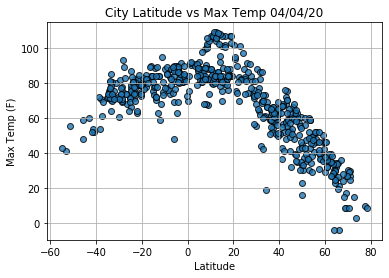

In [19]:
# Build the scatter plot for latitude vs maximu, temperature
plt.scatter(lats,max_temp,
           edgecolor='black', linewidths=1,marker='o',
           alpha=0.8,label='Cities')

# Incorporate the other graph properties
plt.title(f"City Latitude vs Max Temp "+time.strftime("%x"))
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

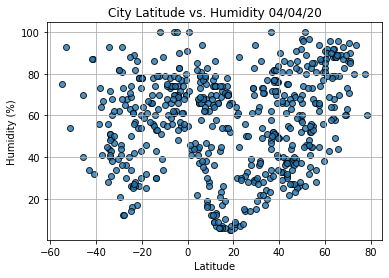

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

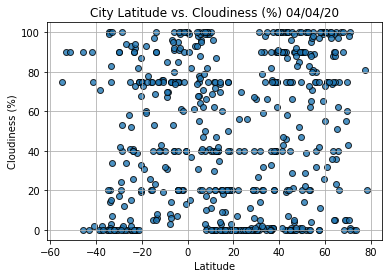

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

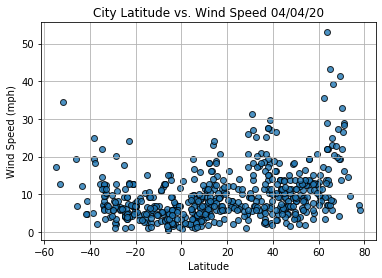

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [38]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data
def plot_linear_regression(x_value, y_value, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_value, y_value)
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_value * slope + intercept
    
    # Get the equation of the line
    line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create scatter plot and plot the regression line
    plt.scatter(x_value, y_value)
    plt.plot(x_value,regress_values,"r")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color='red')
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [39]:
# Create DataFrame for Northern and Southern Hemisphere
northern_hemi_df = city_data_df[(city_data_df['Lat'] >= 0)]
southern_hemi_df = city_data_df[(city_data_df['Lat'] < 0)]

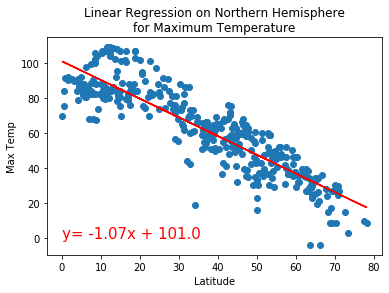

In [40]:
x_value = northern_hemi_df['Lat']
y_value = northern_hemi_df['Max Temp']
plot_linear_regression(x_value,y_value,'Linear Regression on Northern Hemisphere\nfor Maximum Temperature','Max Temp',(0,0))

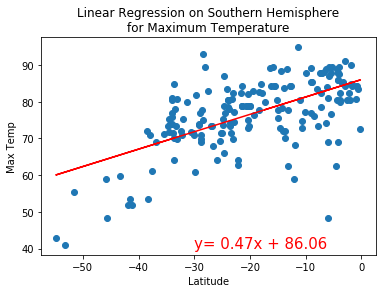

In [41]:
x_value = southern_hemi_df['Lat']
y_value = southern_hemi_df['Max Temp']
plot_linear_regression(x_value,y_value,'Linear Regression on Southern Hemisphere\nfor Maximum Temperature','Max Temp',(-30,40))

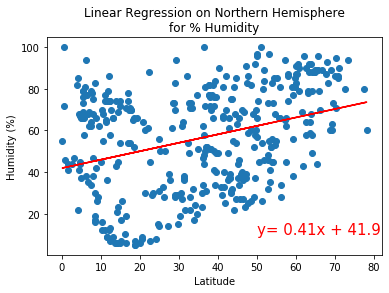

In [42]:
x_value = northern_hemi_df['Lat']
y_value = northern_hemi_df['Humidity']
plot_linear_regression(x_value,y_value,'Linear Regression on Northern Hemisphere\nfor % Humidity','Humidity (%)',(50,10))

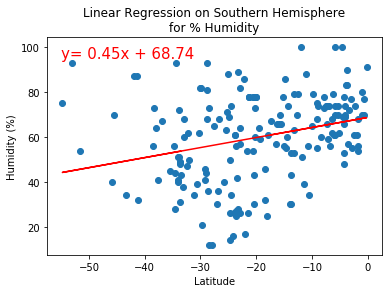

In [47]:
x_value = southern_hemi_df['Lat']
y_value = southern_hemi_df['Humidity']
plot_linear_regression(x_value,y_value,'Linear Regression on Southern Hemisphere\nfor % Humidity','Humidity (%)',(-55,95))

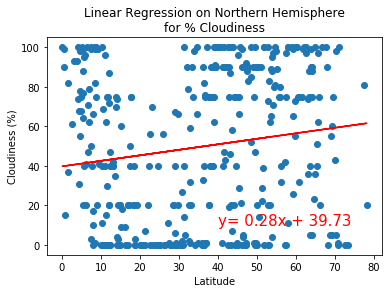

In [53]:
x_value = northern_hemi_df['Lat']
y_value = northern_hemi_df['Cloudiness']
plot_linear_regression(x_value,y_value,'Linear Regression on Northern Hemisphere\nfor % Cloudiness','Cloudiness (%)',(40,10))

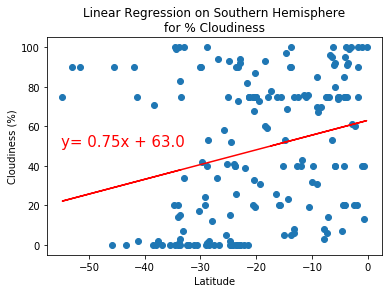

In [52]:
x_value = southern_hemi_df['Lat']
y_value = southern_hemi_df['Cloudiness']
plot_linear_regression(x_value,y_value,'Linear Regression on Southern Hemisphere\nfor % Cloudiness','Cloudiness (%)',(-55,50))

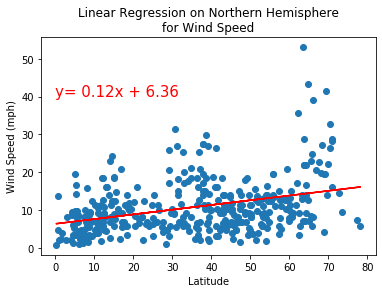

In [55]:
x_value = northern_hemi_df['Lat']
y_value = northern_hemi_df['Wind Speed']
plot_linear_regression(x_value,y_value,'Linear Regression on Northern Hemisphere\nfor Wind Speed','Wind Speed (mph)',(0,40))

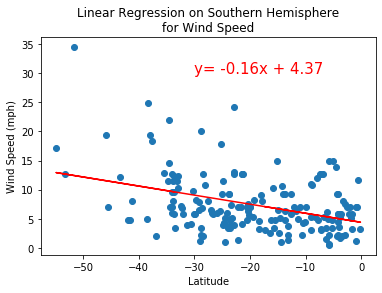

In [57]:
x_value = southern_hemi_df['Lat']
y_value = southern_hemi_df['Wind Speed']
plot_linear_regression(x_value,y_value,'Linear Regression on Southern Hemisphere\nfor Wind Speed','Wind Speed (mph)',(-30,30))